In [1]:
import requests

def validate_api_key(api_key):
    """Check if the API key is valid by making a test request."""
    test_city = "London"
    url = f'http://api.openweathermap.org/data/2.5/weather?q={test_city}&appid={api_key}&units=metric'
    response = requests.get(url)

    if response.status_code == 200:
        return True
    else:
        print(f"Error: Invalid API Key or other issue. Status Code: {response.status_code}")
        print("Response:", response.json())  # Debugging output
        return False

def get_coordinates(city, api_key):
    """Fetch latitude and longitude of a city using OpenWeather Geocoding API."""
    geo_url = f'http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={api_key}'
    response = requests.get(geo_url)
    data = response.json()

    if response.status_code == 200 and data:
        lat, lon = data[0]['lat'], data[0]['lon']
        return lat, lon
    else:
        print(f"Error fetching coordinates for {city}: {data.get('message', 'Unknown error')}")
        return None, None

def fetch_weather_data(city, api_key):
    """Fetch weather data for a given city."""
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric'
    response = requests.get(url)
    data = response.json()

    if response.status_code == 200:
        temperature = data['main']['temp']
        humidity = data['main']['humidity']
        wind_speed = data['wind']['speed']
        return temperature, humidity, wind_speed
    else:
        print(f"Error fetching weather data for {city}: {data.get('message', 'Unknown error')}")
        return None, None, None

def fetch_air_quality(lat, lon, api_key):
    """Fetch air pollution data (PM10, PM2.5, NO2, SO2, O3) using OpenWeather Air Pollution API."""
    air_quality_url = f'http://api.openweathermap.org/data/2.5/air_pollution?lat={lat}&lon={lon}&appid={api_key}'
    response = requests.get(air_quality_url)
    data = response.json()

    if response.status_code == 200:
        components = data['list'][0]['components']
        pm10 = components.get('pm10', 'N/A')
        pm2_5 = components.get('pm2_5', 'N/A')
        no2 = components.get('no2', 'N/A')
        so2 = components.get('so2', 'N/A')
        o3 = components.get('o3', 'N/A')
        return pm10, pm2_5, no2, so2, o3
    else:
        print(f"Error fetching air quality data: {data.get('message', 'Unknown error')}")
        return None, None, None, None, None

# Define API Key
api_key = '4b3111663b44999bac8085e2c2b772ed'  # Replace with your OpenWeather API Key

# Validate API Key before proceeding
if validate_api_key(api_key):
    city = input('Enter the city name: ')
    
    lat, lon = get_coordinates(city, api_key)
    
    if lat is not None and lon is not None:
        temperature, humidity, wind_speed = fetch_weather_data(city, api_key)
        pm10, pm2_5, no2, so2, o3 = fetch_air_quality(lat, lon, api_key)

        if temperature is not None:
            print(f'Temperature: {temperature}°C, Humidity: {humidity}%, Wind Speed: {wind_speed} m/s')
            print(f'PM10: {pm10} µg/m³, PM2.5: {pm2_5} µg/m³, NO2: {no2} µg/m³, SO2: {so2} µg/m³, O3: {o3} µg/m³')


Enter the city name:  delhi


Temperature: 23.05°C, Humidity: 64%, Wind Speed: 2.06 m/s
PM10: 128.56 µg/m³, PM2.5: 91.19 µg/m³, NO2: 33.24 µg/m³, SO2: 56.27 µg/m³, O3: 110.15 µg/m³


In [4]:
!pip install xgboost



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
file_path = "air_quality_health_impact_data.csv"  # Change this to your actual dataset file path
df = pd.read_csv(file_path)

# Select features and target
features = ['PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed']
target = 'AQI'  # Assuming AQI is the target variable

X = df[features]
y = df[target]

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for deep learning)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.linear_model import LinearRegression

print("\n🔹 Training Linear Regression Model...")
lr = LinearRegression()
lr.fit(X_train, y_train)

# Testing
print("🔹 Testing Linear Regression Model...")
y_pred_lr = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f"🔹 Linear Regression - MAE: {lr_mae:.2f}, R² Score: {lr_r2:.2f}")



🔹 Training Linear Regression Model...
🔹 Testing Linear Regression Model...
🔹 Linear Regression - MAE: 128.87, R² Score: -0.00


In [12]:
from sklearn.ensemble import RandomForestRegressor

print("\n🔹 Training Random Forest Model (Epoch-wise logging)...")
rf = RandomForestRegressor(n_estimators=100, random_state=42, verbose=1)
rf.fit(X_train, y_train)

# Testing
print("🔹 Testing Random Forest Model...")
y_pred_rf = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"🔹 Random Forest - MAE: {rf_mae:.2f}, R² Score: {rf_r2:.2f}")



🔹 Training Random Forest Model (Epoch-wise logging)...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.6s


🔹 Testing Random Forest Model...
🔹 Random Forest - MAE: 129.77, R² Score: -0.03


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [13]:
import xgboost as xgb

print("\n🔹 Training XGBoost Model (Epoch-wise logging)...")
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42, verbosity=1)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# Testing
print("🔹 Testing XGBoost Model...")
y_pred_xgb = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)
print(f"🔹 XGBoost - MAE: {xgb_mae:.2f}, R² Score: {xgb_r2:.2f}")



🔹 Training XGBoost Model (Epoch-wise logging)...
[0]	validation_0-rmse:146.79984
[1]	validation_0-rmse:147.25546
[2]	validation_0-rmse:147.48635
[3]	validation_0-rmse:147.42343
[4]	validation_0-rmse:147.41291
[5]	validation_0-rmse:147.54265
[6]	validation_0-rmse:147.61896
[7]	validation_0-rmse:148.12497
[8]	validation_0-rmse:148.71650
[9]	validation_0-rmse:148.80776
[10]	validation_0-rmse:149.10024
[11]	validation_0-rmse:149.40615
[12]	validation_0-rmse:149.71098
[13]	validation_0-rmse:149.85744
[14]	validation_0-rmse:149.83629
[15]	validation_0-rmse:150.18765
[16]	validation_0-rmse:150.57643
[17]	validation_0-rmse:150.51627
[18]	validation_0-rmse:150.45229
[19]	validation_0-rmse:150.63452
[20]	validation_0-rmse:150.94129
[21]	validation_0-rmse:151.10735
[22]	validation_0-rmse:151.46141
[23]	validation_0-rmse:151.37951
[24]	validation_0-rmse:151.90160
[25]	validation_0-rmse:152.44050
[26]	validation_0-rmse:152.58100
[27]	validation_0-rmse:152.59293
[28]	validation_0-rmse:152.71673
[29


🔹 Training Deep Learning Model (Epoch-wise tracking)...
Epoch 1/100


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 238.7548 - mae: 238.7548 - val_loss: 147.1542 - val_mae: 147.1542
Epoch 2/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 135.2761 - mae: 135.2761 - val_loss: 129.6916 - val_mae: 129.6916
Epoch 3/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 126.1457 - mae: 126.1457 - val_loss: 129.3707 - val_mae: 129.3707
Epoch 4/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 125.1881 - mae: 125.1881 - val_loss: 129.7544 - val_mae: 129.7544
Epoch 5/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 124.5727 - mae: 124.5727 - val_loss: 129.6702 - val_mae: 129.6702
Epoch 6/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 125.2994 - mae: 125.2994 - val_loss: 129.4427 - val_mae: 129.4427
Epoch 7/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 125.4335 - mae: 125.4335 - val_loss: 129.4682 - val_mae: 129.4682
Epoch 8/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 125.5179 - mae: 125.5179 - val_loss: 129.5722 - va

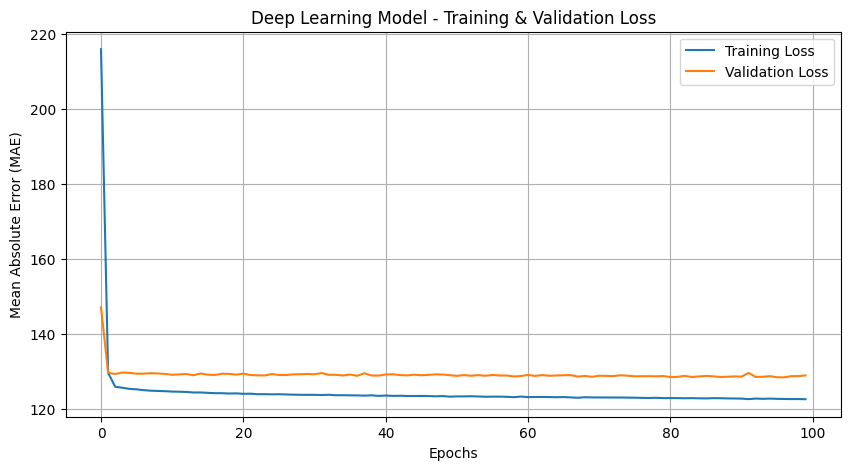

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print("\n🔹 Training Deep Learning Model (Epoch-wise tracking)...")

dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

dl_model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Train with detailed epoch tracking
EPOCHS = 100
history = dl_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), 
                        epochs=EPOCHS, batch_size=16, verbose=1)

# Testing
print("🔹 Testing Deep Learning Model...")
y_pred_dl = dl_model.predict(X_test_scaled).flatten()
dl_mae = mean_absolute_error(y_test, y_pred_dl)
dl_r2 = r2_score(y_test, y_pred_dl)
print(f"🔹 Deep Learning - MAE: {dl_mae:.2f}, R² Score: {dl_r2:.2f}")

# Plot loss vs. epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Deep Learning Model - Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Compare models in a DataFrame
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost", "Deep Learning"],
    "MAE": [lr_mae, rf_mae, xgb_mae, dl_mae],
    "R2 Score": [lr_r2, rf_r2, xgb_r2, dl_r2]
})

print("\n🔹 Model Performance Comparison:\n", results)

# Select the best model based on R² score
best_model = results.sort_values(by="R2 Score", ascending=False).iloc[0]
print(f"\n🏆 Best Model: {best_model['Model']}")



🔹 Model Performance Comparison:
                Model         MAE  R2 Score
0  Linear Regression  128.874295 -0.003666
1      Random Forest  129.768288 -0.030080
2            XGBoost  134.921560 -0.177367
3      Deep Learning  128.981663 -0.022078

🏆 Best Model: Linear Regression


In [17]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  # Linear Regression model

# Load dataset
df = pd.read_csv("air_quality_health_impact_data.csv")  # Replace with actual dataset path

# Features & Target
features = ['PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed']
target = 'AQI'

X = df[features]
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Data (important for models like Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
best_model = LinearRegression()
best_model.fit(X_train, y_train)

# Save model and scaler
joblib.dump(best_model, "best_aqi_model_linear.pkl")
joblib.dump(scaler, "scaler_linear.pkl")

print("✅ Best Linear Regression Model Trained & Saved Successfully!")


✅ Best Linear Regression Model Trained & Saved Successfully!


In [18]:
import joblib
import numpy as np

# Load the trained Linear Regression model and scaler
best_model = joblib.load("best_aqi_model_linear.pkl")
scaler = joblib.load("scaler_linear.pkl")

# Function to take manual input from the user
def get_input():
    print("Please enter the following air quality factors:")
    
    # Manually get the input values
    pm10 = float(input("PM10 (µg/m³): "))
    pm2_5 = float(input("PM2.5 (µg/m³): "))
    no2 = float(input("NO2 (µg/m³): "))
    so2 = float(input("SO2 (µg/m³): "))
    o3 = float(input("O3 (µg/m³): "))
    temp = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    wind_speed = float(input("Wind Speed (m/s): "))
    
    return [pm10, pm2_5, no2, so2, o3, temp, humidity, wind_speed]

# Get user input
user_input = get_input()

# Prepare input data for prediction
input_data = np.array([user_input])
input_scaled = scaler.transform(input_data)

# Predict AQI using the Linear Regression model
predicted_aqi = best_model.predict(input_scaled)[0]

# Output the result
print(f"\n✅ Predicted AQI: {predicted_aqi:.2f}")


Please enter the following air quality factors:


PM10 (µg/m³):  128.56
PM2.5 (µg/m³):  91.19
NO2 (µg/m³):  33.24
SO2 (µg/m³):  56.27
O3 (µg/m³):  110.15
Temperature (°C):  23.06
Humidity (%):  64
Wind Speed (m/s):  2.06



✅ Predicted AQI: 246.16


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
import numpy as np
from geopy.distance import geodesic

# Load the trained Linear Regression model and scaler
best_model = joblib.load("best_aqi_model_linear.pkl")
scaler = joblib.load("scaler_linear.pkl")

# Function to take manual input from the user
def get_input():
    print("Please enter the following air quality factors:")

    # Manually get the input values
    pm10 = float(input("PM10 (µg/m³): "))
    pm2_5 = float(input("PM2.5 (µg/m³): "))
    no2 = float(input("NO2 (µg/m³): "))
    so2 = float(input("SO2 (µg/m³): "))
    o3 = float(input("O3 (µg/m³): "))
    temp = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    wind_speed = float(input("Wind Speed (m/s): "))
    lat = float(input("Latitude of the city: "))
    lon = float(input("Longitude of the city: "))
    
    return [pm10, pm2_5, no2, so2, o3, temp, humidity, wind_speed, lat, lon]

# Function to get nearby locations within a 20km radius
def get_nearby_locations(user_lat, user_lon, radius_km=20):
    nearby_locations = []

    # Assume the dataset contains latitude, longitude, and AQI for each location
    df = pd.read_csv("air_quality_health_impact_data.csv")  # Replace with your actual dataset

    for _, row in df.iterrows():
        loc = (row['Latitude'], row['Longitude'])
        distance = geodesic((user_lat, user_lon), loc).km

        if distance <= radius_km:  # If within 20km radius
            nearby_locations.append({
                "Latitude": row['Latitude'],
                "Longitude": row['Longitude'],
                "AQI": row['AQI'],
                "Distance (km)": round(distance, 2)
            })

    return nearby_locations

# Main execution
user_input = get_input()

# Prepare input data for prediction
input_data = np.array([user_input[:8]])  # Only the first 8 features (PM10, PM2.5, etc.)
input_scaled = scaler.transform(input_data)

# Predict AQI using the Linear Regression model
predicted_aqi = best_model.predict(input_scaled)[0]

# Get nearby locations within 20km radius
user_lat = user_input[8]
user_lon = user_input[9]
nearby_aqi_data = get_nearby_locations(user_lat, user_lon)

# Output the result
print(f"\n✅ Predicted AQI for your location: {predicted_aqi:.2f}")
print("\n✅ Nearby AQI Data within 20km radius:")

for loc in nearby_aqi_data:
    print(f"Latitude: {loc['Latitude']}, Longitude: {loc['Longitude']}, AQI: {loc['AQI']}, Distance: {loc['Distance (km)']} km")


Please enter the following air quality factors:
